In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily
from keplergl import KeplerGl

In [2]:
roads = gpd.read_file('../data/egypt/gis_osm_roads_free_1.shp').to_crs(epsg=4326)

In [3]:
roads.shape

(1807496, 11)

In [4]:
roads.isnull().sum()

osm_id            0
code              0
fclass            0
name        1563293
ref         1803361
oneway            0
maxspeed          0
layer             0
bridge            0
tunnel            0
geometry          0
dtype: int64

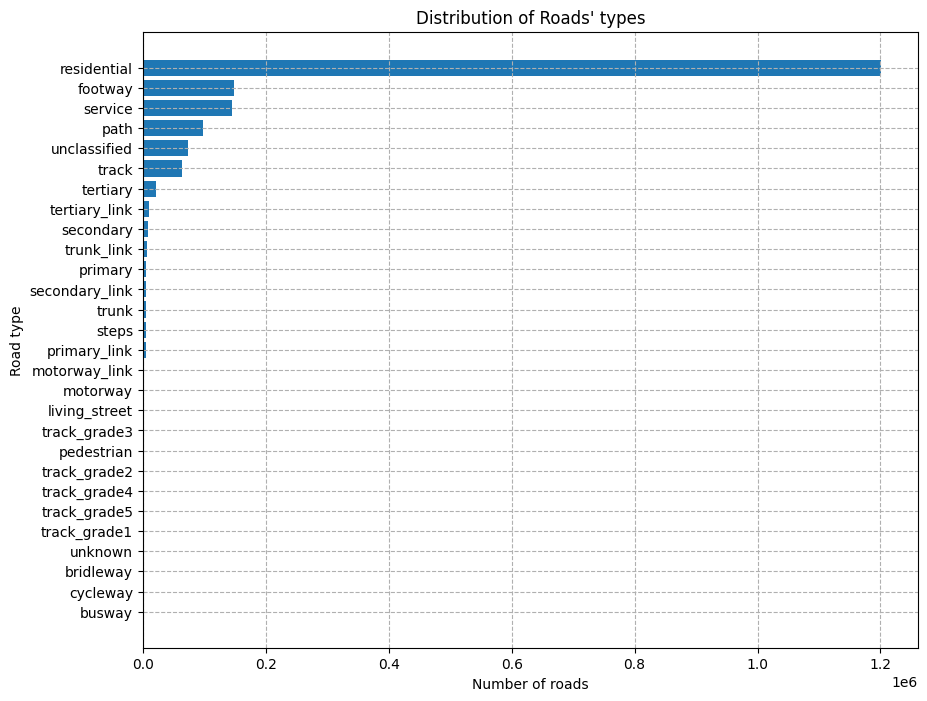

In [5]:
road_type_counts = roads['fclass'].value_counts().sort_values()

plt.figure(figsize=(10, 8))
plt.barh(
  y=road_type_counts.index, 
  width=road_type_counts.values,

  )
plt.grid(linestyle='--')
plt.title("Distribution of Roads' types")
plt.xlabel("Number of roads")
plt.ylabel("Road type")
plt.show()

In [6]:
alex = gpd.read_file('../data/egypt/alexandria.geojson').to_crs(epsg=4326)

KeyboardInterrupt: 

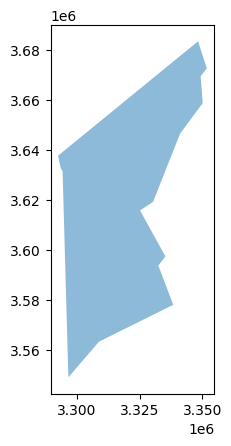

In [7]:
ax = alex.to_crs(epsg=3857).plot(alpha=0.5)
contextily.add_basemap(ax=ax)

In [8]:
road_geo = roads.geometry
alex_polygon = alex.geometry.iloc[0]

alex_roads_mask = road_geo.within(alex_polygon, align=True)
alex_roads = roads[alex_roads_mask]

In [9]:
alex_roads_plot = KeplerGl()
alex_roads_plot.add_data(data=alex_roads)
alex_roads_plot

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'unnamed': {'index': [233, 240, 241, 284, 285, 286, 287, 288, 289, 298, 299, 300, 301, 302, 303…